In [148]:
import pathlib

import datetime as dt

import itertools

import numpy as np
import pandas as pd

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn import metrics

from sklearn import preprocessing
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [155]:
base_path = pathlib.Path.cwd().parent
business_path = base_path.joinpath('data_lake/business/')
models_path = base_path.joinpath('src/models')
data = pd.read_csv(business_path.joinpath('precios-diarios.csv'), index_col=0)
data.index = pd.to_datetime(data.index)


<AxesSubplot:>

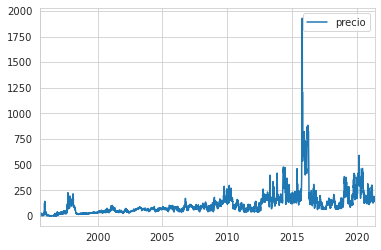

In [84]:
data.plot()

In [85]:
n_lags = [30, 60]

list_lags = [0] + list(range(1, n_lags[0])) + list(range(n_lags[0], n_lags[1] ))[::2]

df_lag = data.copy()
df_lags = pd.concat([df_lag.shift(shift) for shift in list_lags], axis=1)
df_lags = df_lags.dropna()
df_lags.columns = list_lags
df_lags

,0,1,2,3,4,5,6,7,8,9,...,40,42,44,46,48,50,52,54,56,58
1995-09-16,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,15.187500,15.479167,...,2.786792,2.098458,1.309250,1.520292,0.846000,0.544208,0.996167,2.015208,3.662167,1.392091
1995-09-17,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,15.187500,...,5.070833,2.451667,1.555417,0.713167,0.449167,0.684042,0.944958,3.344917,1.150167,2.559708
1995-09-18,6.637000,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,...,10.390667,2.786792,2.098458,1.309250,1.520292,0.846000,0.544208,0.996167,2.015208,3.662167
1995-09-19,10.457667,6.637000,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,...,17.051292,5.070833,2.451667,1.555417,0.713167,0.449167,0.684042,0.944958,3.344917,1.150167
1995-09-20,12.141667,10.457667,6.637000,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,...,19.775000,10.390667,2.786792,2.098458,1.309250,1.520292,0.846000,0.544208,0.996167,2.015208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-27,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,163.360000,168.795000,...,167.666667,187.160833,167.080833,171.964167,181.680000,176.781667,196.920417,186.173333,232.928333,241.612083
2021-04-28,177.259167,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,163.360000,...,172.715833,172.008333,164.124167,177.892917,169.350833,189.492500,177.336667,185.577917,208.663333,208.596667
2021-04-29,165.518333,177.259167,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,...,145.734167,167.666667,187.160833,167.080833,171.964167,181.680000,176.781667,196.920417,186.173333,232.928333
2021-04-30,157.586667,165.518333,177.259167,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,...,126.096667,172.715833,172.008333,164.124167,177.892917,169.350833,189.492500,177.336667,185.577917,208.663333


,0,1,2,3,4,5,6,7,8,9,...,40,42,44,46,48,50,52,54,56,58
1995-09-16,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,15.187500,15.479167,...,2.786792,2.098458,1.309250,1.520292,0.846000,0.544208,0.996167,2.015208,3.662167,1.392091
1995-09-17,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,15.187500,...,5.070833,2.451667,1.555417,0.713167,0.449167,0.684042,0.944958,3.344917,1.150167,2.559708
1995-09-18,6.637000,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,...,10.390667,2.786792,2.098458,1.309250,1.520292,0.846000,0.544208,0.996167,2.015208,3.662167
1995-09-19,10.457667,6.637000,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,...,17.051292,5.070833,2.451667,1.555417,0.713167,0.449167,0.684042,0.944958,3.344917,1.150167
1995-09-20,12.141667,10.457667,6.637000,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,...,19.775000,10.390667,2.786792,2.098458,1.309250,1.520292,0.846000,0.544208,0.996167,2.015208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-27,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,163.360000,168.795000,...,167.666667,187.160833,167.080833,171.964167,181.680000,176.781667,196.920417,186.173333,232.928333,241.612083
2021-04-28,177.259167,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,163.360000,...,172.715833,172.008333,164.124167,177.892917,169.350833,189.492500,177.336667,185.577917,208.663333,208.596667
2021-04-29,165.518333,177.259167,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,...,145.734167,167.666667,187.160833,167.080833,171.964167,181.680000,176.781667,196.920417,186.173333,232.928333
2021-04-30,157.586667,165.518333,177.259167,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,...,126.096667,172.715833,172.008333,164.124167,177.892917,169.350833,189.492500,177.336667,185.577917,208.663333


<AxesSubplot:>

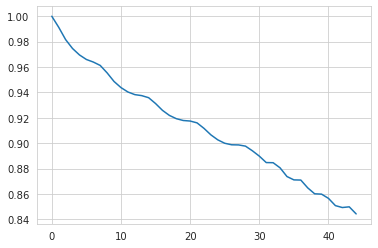

In [70]:
df_lag = data.copy().diff(periods=1)
method = 'spearman'
corrs = df_lags.corr(method=method)
corrs = corrs.reset_index(drop=True)

corrs.iloc[:, 0].plot()

In [71]:
end_data_train = int(len(df_lags) * 0.70)
star_data_test = end_data_train + n_lags[1]

X = df_lags.copy().drop(columns=[0])
y = df_lags.copy().iloc[:, [0]]

X_train = X.iloc[:end_data_train]
y_train = y.iloc[:end_data_train]

X_test = X.iloc[star_data_test:]
y_test = y.iloc[star_data_test:]

end_data_train, star_data_test

(6552, 6612)

In [72]:
X_train

,1,2,3,4,5,6,7,8,9,10,...,40,42,44,46,48,50,52,54,56,58
1995-09-16,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,15.187500,15.479167,14.041667,...,2.786792,2.098458,1.309250,1.520292,0.846000,0.544208,0.996167,2.015208,3.662167,1.392091
1995-09-17,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,15.187500,15.479167,...,5.070833,2.451667,1.555417,0.713167,0.449167,0.684042,0.944958,3.344917,1.150167,2.559708
1995-09-18,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,15.187500,...,10.390667,2.786792,2.098458,1.309250,1.520292,0.846000,0.544208,0.996167,2.015208,3.662167
1995-09-19,6.637000,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,15.387500,...,17.051292,5.070833,2.451667,1.555417,0.713167,0.449167,0.684042,0.944958,3.344917,1.150167
1995-09-20,10.457667,6.637000,7.270125,10.358000,11.660417,11.740417,12.976000,12.298750,14.822333,14.958333,...,19.775000,10.390667,2.786792,2.098458,1.309250,1.520292,0.846000,0.544208,0.996167,2.015208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-08-19,151.172242,166.117911,150.737056,136.824906,141.349010,152.072807,162.578326,181.825279,196.596920,181.197120,...,335.858013,292.329651,203.831287,175.026763,160.328255,137.783686,179.668091,194.735106,163.401007,144.118372
2013-08-20,134.485023,151.172242,166.117911,150.737056,136.824906,141.349010,152.072807,162.578326,181.825279,196.596920,...,323.202634,318.903186,219.185331,189.253459,179.107243,141.672222,172.006661,188.320542,191.979858,149.768745
2013-08-21,137.397482,134.485023,151.172242,166.117911,150.737056,136.824906,141.349010,152.072807,162.578326,181.825279,...,319.941448,335.858013,292.329651,203.831287,175.026763,160.328255,137.783686,179.668091,194.735106,163.401007
2013-08-22,128.986728,137.397482,134.485023,151.172242,166.117911,150.737056,136.824906,141.349010,152.072807,162.578326,...,251.282813,323.202634,318.903186,219.185331,189.253459,179.107243,141.672222,172.006661,188.320542,191.979858


In [73]:
X_test

,1,2,3,4,5,6,7,8,9,10,...,40,42,44,46,48,50,52,54,56,58
2013-10-23,228.991511,194.588334,195.993962,184.665456,187.878121,191.161130,187.520392,176.921417,178.210024,166.223755,...,152.967472,147.537436,129.911353,130.082664,138.992283,157.847668,152.086526,102.451840,102.759997,124.473979
2013-10-24,255.963931,228.991511,194.588334,195.993962,184.665456,187.878121,191.161130,187.520392,176.921417,178.210024,...,153.481390,143.943703,137.421325,101.969089,138.105008,141.408316,143.930335,148.881151,96.401663,122.815434
2013-10-25,275.734530,255.963931,228.991511,194.588334,195.993962,184.665456,187.878121,191.161130,187.520392,176.921417,...,151.125655,152.967472,147.537436,129.911353,130.082664,138.992283,157.847668,152.086526,102.451840,102.759997
2013-10-26,269.062516,275.734530,255.963931,228.991511,194.588334,195.993962,184.665456,187.878121,191.161130,187.520392,...,128.957898,153.481390,143.943703,137.421325,101.969089,138.105008,141.408316,143.930335,148.881151,96.401663
2013-10-27,260.833299,269.062516,275.734530,255.963931,228.991511,194.588334,195.993962,184.665456,187.878121,191.161130,...,161.341236,151.125655,152.967472,147.537436,129.911353,130.082664,138.992283,157.847668,152.086526,102.451840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-27,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,163.360000,168.795000,164.631667,...,167.666667,187.160833,167.080833,171.964167,181.680000,176.781667,196.920417,186.173333,232.928333,241.612083
2021-04-28,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,163.360000,168.795000,...,172.715833,172.008333,164.124167,177.892917,169.350833,189.492500,177.336667,185.577917,208.663333,208.596667
2021-04-29,177.259167,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,163.360000,...,145.734167,167.666667,187.160833,167.080833,171.964167,181.680000,176.781667,196.920417,186.173333,232.928333
2021-04-30,165.518333,177.259167,189.621667,181.194167,179.564167,180.178333,176.387500,178.963333,180.631667,176.011667,...,126.096667,172.715833,172.008333,164.124167,177.892917,169.350833,189.492500,177.336667,185.577917,208.663333


<AxesSubplot:>

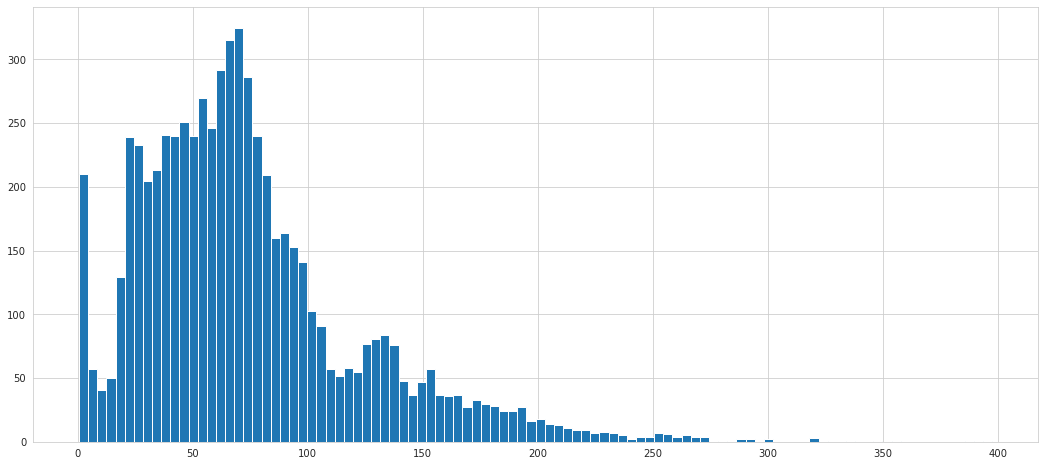

In [74]:
X_train.iloc[:, 0].hist(bins=100, figsize=(18, 8))

In [75]:
X_train.iloc[:, [0]].quantile(np.arange(0, 1.01, 0.01))

,1
0.00,0.500000
0.01,1.766783
0.02,2.700158
0.03,3.903761
0.04,7.803960
...,...
0.96,181.819331
0.97,191.676506
0.98,206.103940
0.99,233.962052


In [76]:
scaler_x = preprocessing.RobustScaler(
    with_centering=True, with_scaling=True, quantile_range=(10, 90)
)
scaler_x.fit(X_train)

X_train_scaled = pd.DataFrame(scaler_x.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler_x.transform(X_test), index=X_test.index, columns=X_test.columns)

scaler_y = preprocessing.RobustScaler(
    with_centering=True, with_scaling=True, quantile_range=(10, 90)
)
scaler_y.fit(y_train)

y_train_scaled = pd.DataFrame(scaler_y.transform(y_train), index=y_train.index, columns=y_train.columns)
y_test_scaled = pd.DataFrame(scaler_y.transform(y_test), index=y_test.index, columns=y_test.columns)


<AxesSubplot:>

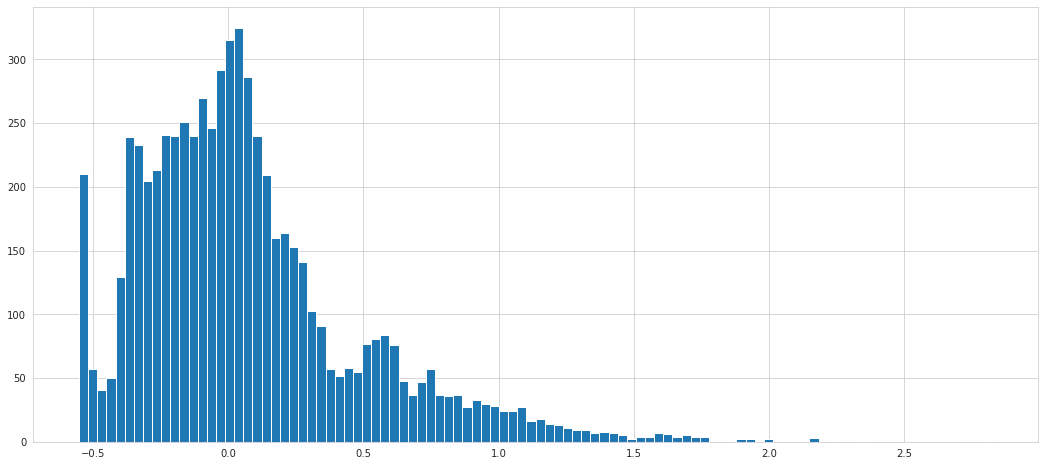

In [77]:
X_train_scaled.iloc[:, 0].hist(bins=100, figsize=(18, 8))

In [78]:
pca = PCA(n_components=len(X_train_scaled.columns))
pca.fit(X_train_scaled)

PCA(n_components=44)

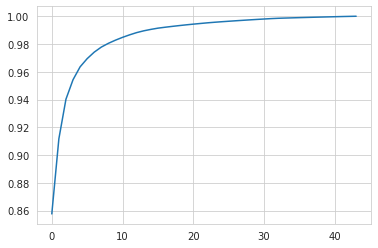

In [79]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [102]:
n_components = 10
list_components = np.arange(1, n_components + 1, 1)
scaler_pipeline = preprocessing.RobustScaler(
    with_centering=True, with_scaling=True, quantile_range=(10, 90)
)
pca_pipeline = PCA(n_components=10)

pipeline =  Pipeline(steps=[("scaler", scaler_pipeline), ("pca", pca_pipeline)])
pipeline.fit(X_train)

X_train_pipeline = pd.DataFrame(pipeline.transform(X_train), index=X_train.index, columns=list_components)
X_test_pipeline = pd.DataFrame(pipeline.transform(X_test), index=X_test.index, columns=list_components)

<AxesSubplot:>

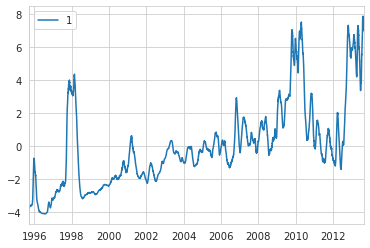

In [101]:
X_train_pipeline.iloc[:, [0]].plot()

In [156]:
models_dict = {
    'Ridge': {
        'estimator': Ridge(),
        'n_cv': 10,
        'parameters_model' :{
            'estimator__alpha': np.logspace(-8, 8, 300)
        }
    },
    'Lasso': {
        'estimator': Lasso(),
        'n_cv': 10,
        'parameters_model' :{
            'estimator__alpha': np.logspace(-6, 8, 300)
        }
    },
    'ElasticNet': {
        'estimator': ElasticNet(),
        'n_cv': 10,
        'parameters_model' :{
            'estimator__alpha': np.logspace(-4, 2, 300),
            'estimator__l1_ratio': [0.05, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
        }
    },
    'KNeighborsRegressor': {
        'estimator': KNeighborsRegressor(),
        'n_cv': 10,
        'parameters_model': {
            'estimator__n_neighbors': range(3, 30),
            'estimator__weights': ['uniform','distance'],
            'estimator__p': [1, 2, 3],
        }
    },
    'RandomForestRegressor': {
        'estimator': RandomForestRegressor(
            oob_score=False,
            random_state=123,
            warm_start=True
        ),
        'n_cv': 8,
        'parameters_model': {
            'estimator__max_features' : [1, 'sqrt', 'log2'],
            'estimator__n_estimators': [400, 600, 800, 1000],
            'estimator__max_depth': [1, 3, 5, 10, 20],
            # 'estimator__ccp_alpha': np.logspace(-4, 4, 16)
        }
    },
    'GradientBoostingRegressor': {
        'estimator': GradientBoostingRegressor(
            n_estimators=500,
            random_state=123,
            # Activación de la parada temprana
            validation_fraction=0.1,
            n_iter_no_change=5,
            tol=0.0001
        ),
        'n_cv': 8,
        'parameters_model': {
            'estimator__max_features' : [1, 'sqrt', 'log2'],
            'estimator__max_depth' : [1, 3, 5, 10, 20],
            'estimator__subsample' : [0.5, 1],
            'estimator__learning_rate' : [0.001, 0.01, 0.1],
        }
    },
    'SVR': {
        'estimator': SVR(cache_size=1000),
        'n_cv': 8,
        'parameters_model': [
            {"estimator__kernel": ["rbf"], "estimator__gamma": [1e-3, 1e-4], "estimator__C": [1, 10, 100, 1000]},
            {"estimator__kernel": ["linear"], "estimator__C": [1, 10, 100, 1000]}
        ],
    },
}

In [157]:
tscv = TimeSeriesSplit(n_splits=10)

n_components = 10
list_components = np.arange(1, n_components + 1, 1)

df_y_train_predict = pd.DataFrame(index=y_train.index, columns=models_dict.keys())
df_y_test_predict = pd.DataFrame(index=X_test.index, columns=models_dict.keys())

for model_str in models_dict.keys():

    time = dt.datetime.now()

    ruta_modelo = models_path.joinpath(f'{model_str}.pkl')

    print(f'Entrenando modelo {model_str} ...')

    scaler_pipeline = preprocessing.RobustScaler(
        with_centering=True, with_scaling=True, quantile_range=(10, 90)
    )
    pca_pipeline = PCA(n_components=10)
    model = models_dict[model_str]['estimator']

    pipeline =  Pipeline(steps=[("scaler", scaler_pipeline), ("pca", pca_pipeline), ("estimator", model)])

    parameters_model = models_dict[model_str]['parameters_model']
    parameters = parameters_model # parameters_preprocess |

    clf = GridSearchCV(
        estimator=pipeline,
        param_grid=parameters,
        scoring='neg_mean_squared_error',
        n_jobs=7,
        refit=True,
        cv=tscv, #models_dict[model_str]['n_cv'],
        verbose=1
    )
    clf.fit(X_train, y_train_scaled.to_numpy().ravel())

    y_train_predict = scaler_y.inverse_transform(clf.predict(X_train).reshape(-1, 1))
    y_test_predict = scaler_y.inverse_transform(clf.predict(X_test).reshape(-1, 1))

    df_y_train_predict.loc[:, model_str] = y_train_predict
    df_y_test_predict.loc[:, model_str] = y_test_predict

    # save
    with open(str(ruta_modelo),'wb') as f:
        pickle.dump(clf, f)
    print(model_str, 'saved')

    print(clf.best_params_)
    print(clf.best_score_)
    print('time   ', (dt.datetime.now() - time).total_seconds())

    print('*************************************\n')


df_y_train_predict = pd.concat([df_y_train_predict, y_train], axis=1)
df_y_test_predict = pd.concat([df_y_test_predict, y_test], axis=1)




Entrenando modelo Ridge ...
Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Ridge saved
{'estimator__alpha': 1.0392556829367131e-07}
-0.00972855775816404
time    26.748413
*************************************

Entrenando modelo Lasso ...
Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Lasso saved
{'estimator__alpha': 1.1138398264826206e-06}
-0.009730476597977414
time    25.003655
*************************************

Entrenando modelo ElasticNet ...
Fitting 10 folds for each of 2100 candidates, totalling 21000 fits
ElasticNet saved
{'estimator__alpha': 0.0001096816005273138, 'estimator__l1_ratio': 0.05}
-0.009731991910997998
time    157.954244
*************************************

Entrenando modelo KNeighborsRegressor ...
Fitting 10 folds for each of 162 candidates, totalling 1620 fits
KNeighborsRegressor saved
{'estimator__n_neighbors': 29, 'estimator__p': 3, 'estimator__weights': 'distance'}
-0.049670265855779466
time    25.306301
****************

In [158]:
df_y_train_predict

,Ridge,Lasso,ElasticNet,KNeighborsRegressor,RandomForestRegressor,GradientBoostingRegressor,SVR,0
1995-09-16,10.996968,10.996475,11.017854,10.359123,13.690185,10.009279,12.196937,10.358000
1995-09-17,10.715109,10.712833,10.729048,7.292231,10.693200,8.781531,11.700345,7.270125
1995-09-18,9.851182,9.848784,9.861500,6.658666,8.857357,8.792978,10.714915,6.637000
1995-09-19,9.256359,9.254046,9.262115,10.453978,11.074862,10.480537,10.062232,10.457667
1995-09-20,10.092270,10.089845,10.091231,12.140779,12.187301,11.123879,10.860193,12.141667
...,...,...,...,...,...,...,...,...
2013-08-19,144.620776,144.621462,144.644631,134.728509,139.698068,135.191142,142.206894,134.485023
2013-08-20,141.100530,141.104871,141.118491,137.610709,138.542136,135.331472,138.868376,137.397482
2013-08-21,137.499051,137.509413,137.519710,129.051681,131.827816,128.390512,135.868141,128.986728
2013-08-22,135.003132,135.015786,135.034249,114.728401,125.374881,115.445139,133.659422,114.529042


In [159]:
tuples = list(itertools.product(models_dict.keys(), ['train', 'test',]))
multi_index = pd.MultiIndex.from_tuples(tuples, names=["model", "period"])

df_metrics = pd.DataFrame(columns=multi_index)

for model_str in models_dict.keys():

    tmp_test = df_y_test_predict.loc[:, [0, model_str]].to_numpy().T

    df_metrics.loc['r2', (model_str, 'test')] = metrics.r2_score(tmp_test[0], tmp_test[1])
    df_metrics.loc['explained_variance', (model_str, 'test')] = metrics.explained_variance_score(tmp_test[0], tmp_test[1])
    df_metrics.loc['max_error', (model_str, 'test')] = metrics.max_error(tmp_test[0], tmp_test[1])
    df_metrics.loc['mean_absolute_error', (model_str, 'test')] = metrics.mean_absolute_error(tmp_test[0], tmp_test[1])
    df_metrics.loc['mean_squared_error', (model_str, 'test')] = metrics.mean_squared_error(tmp_test[0], tmp_test[1])
    df_metrics.loc['root_mean_squared_error', (model_str, 'test')] = metrics.mean_squared_error(tmp_test[0], tmp_test[1], squared=False)


    tmp_train = df_y_train_predict.loc[:, [0, model_str]].to_numpy().T

    df_metrics.loc['r2', (model_str, 'train')] = metrics.r2_score(tmp_train[0], tmp_train[1])
    df_metrics.loc['explained_variance', (model_str, 'train')] = metrics.explained_variance_score(tmp_train[0], tmp_train[1])
    df_metrics.loc['max_error', (model_str, 'train')] = metrics.max_error(tmp_train[0], tmp_train[1])
    df_metrics.loc['mean_absolute_error', (model_str, 'train')] = metrics.mean_absolute_error(tmp_train[0], tmp_train[1])
    df_metrics.loc['mean_squared_error', (model_str, 'train')] = metrics.mean_squared_error(tmp_train[0], tmp_train[1])
    df_metrics.loc['root_mean_squared_error', (model_str, 'train')] = metrics.mean_squared_error(tmp_train[0], tmp_train[1], squared=False)

# df_metrics.T.to_csv('./outputs/metrics.csv')

df_metrics.T


r2 explained_variance    max_error  \
model                     period                                             
Ridge                     train   0.951371           0.951371   111.029873   
                          test    0.936116           0.936196   931.683241   
Lasso                     train    0.95137            0.95137   111.035182   
                          test    0.936113           0.936194   931.759859   
ElasticNet                train    0.95137            0.95137   111.070045   
                          test    0.936093           0.936174   931.384072   
KNeighborsRegressor       train   0.999999           0.999999     0.942816   
                          test    0.031686           0.169995  1717.938525   
RandomForestRegressor     train   0.994752           0.994752    39.970948   
                          test    0.088341           0.224699  1589.765699   
GradientBoostingRegressor train   0.993153           0.993155     80.12596   
                          test    0.099083           0.232601  1570.846773   
SVR                       train   0.950903            0.95097   113.907834   
                          test    0.936029           0.936363   943.945495   

                                 mean_absolute_error mean_squared_error  \
model                     period                                          
Ridge                     train             6.529385         117.407296   
                          test             23.901123        2221.348995   
Lasso                     train             6.529131         117.411685   
                          test             23.901227        2221.429831   
ElasticNet                train             6.528014         117.409547   
                          test             23.907326        2222.133248   
KNeighborsRegressor       train               0.0299           0.003375   
                          test             82.152368       33669.727581   
RandomForestRegressor     train              2.29599          12.670086   
                          test             80.973142       31699.727651   
GradientBoostingRegressor train             2.557612          16.530436   
                          test             80.659511         31326.2263   
SVR                       train             6.612542         118.539271   
                          test              23.78429        2224.350632   

                                 root_mean_squared_error  
model                     period                          
Ridge                     train                10.835465  
                          test                 47.131189  
Lasso                     train                10.835667  
                          test                 47.132047  
ElasticNet                train                10.835569  
                          test                 47.139508  
KNeighborsRegressor       train                 0.058092  
                          test                183.493127  
RandomForestRegressor     train                 3.559506  
                          test                178.044173  
GradientBoostingRegressor train                 4.065764  
                          test                176.992165  
SVR                       train                10.887574  
                          test                 47.163022

In [ ]:
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)